<a href="https://colab.research.google.com/github/priyanka-sidhuraj/127/blob/main/142%2C143.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing basic libraries
import pandas as pd
import numpy as np

In [4]:
movies_df=pd.read_csv('/content/movie.csv', usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
ratings_df=pd.read_csv('/content/rating.csv',
    usecols=['userId', 'movieId', 'rating','timestamp'],dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [7]:
#checkinng for NaN values
movies_df.isnull().sum()

movieId    0
title      0
dtype: int64

In [8]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
print("Movies:",movies_df.shape)
print("Ratings:",ratings_df.shape)

Movies: (27278, 2)
Ratings: (130139, 4)


In [10]:
movies_merged_df=movies_df.merge(ratings_df, on='movieId')
movies_merged_df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),11,4.5,2009-01-02 01:13:41


In [11]:
movies_merged_df=movies_merged_df.dropna(axis = 0, subset = ['title'])
movies_merged_df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),11,4.5,2009-01-02 01:13:41


In [12]:
movies_average_rating=movies_merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,title,Average Rating
0,Sands of Iwo Jima (1949),5.0
1,Poolhall Junkies (2002),5.0
2,"Unforgettable Summer, An (Un été inoubliable) ...",5.0
3,"Wild Geese, The (1978)",5.0
4,Jubilee (1977),5.0


In [13]:
movies_rating_count=movies_merged_df.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.head()

,title,Rating Count,Average Rating
0,'Hellboy': The Seeds of Creation (2004),1,2.5
1,It's Alive (1974),1,3.0
2,It's a Boy Girl Thing (2006),1,2.0
3,It's a Gift (1934),1,2.5
4,JCVD (2008),1,2.5


In [14]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')
%matplotlib inline

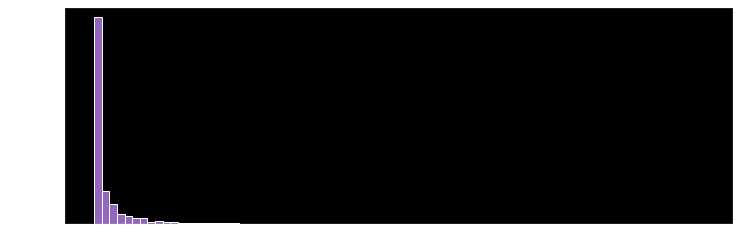

In [15]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80,color='tab:purple')
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.savefig('ratingcounthist.jpg')

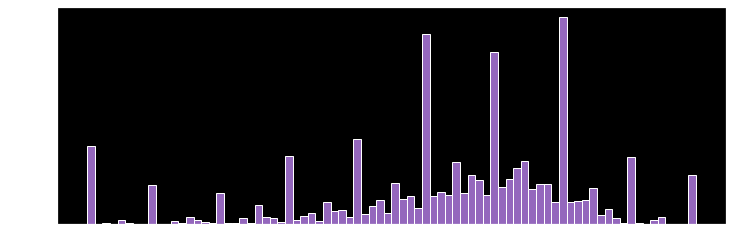

In [16]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80,color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('avgratinghist.jpg')

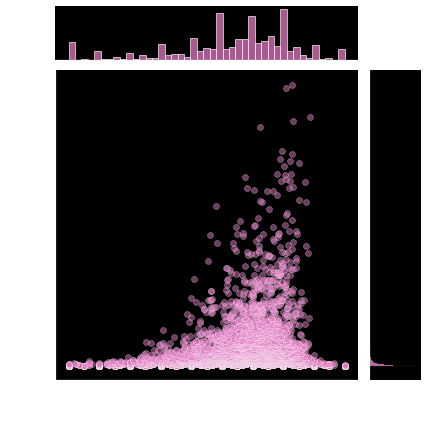

In [17]:
plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5, color='tab:pink')
plot.savefig('joinplot.jpg')

In [18]:
rating_with_RatingCount = movies_merged_df.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),3,4.0,1999-12-11 13:36:47,314
1,1,Toy Story (1995),6,5.0,1997-03-13 17:50:52,314
2,1,Toy Story (1995),8,4.0,1996-06-05 13:37:51,314
3,1,Toy Story (1995),10,4.0,1999-11-25 02:44:47,314
4,1,Toy Story (1995),11,4.5,2009-01-02 01:13:41,314


In [19]:

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(rating_with_RatingCount['Rating Count'].describe())

count   130139.000
mean        84.348
std         88.428
min          1.000
25%         19.000
50%         53.000
75%        123.000
max        441.000
Name: Rating Count, dtype: float64


In [20]:
popularity_threshold = 50
popular_movies= rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()
#popular_movies.shape

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),3,4.000,1999-12-11 13:36:47,314
1,1,Toy Story (1995),6,5.000,1997-03-13 17:50:52,314
2,1,Toy Story (1995),8,4.000,1996-06-05 13:37:51,314
3,1,Toy Story (1995),10,4.000,1999-11-25 02:44:47,314
4,1,Toy Story (1995),11,4.500,2009-01-02 01:13:41,314


In [21]:
import os
movie_features_df=popular_movies.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()
movie_features_df.to_excel('output.xlsx')

In [22]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [23]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [24]:
movie_features_df.shape

(631, 887)

In [25]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

95


In [26]:

movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,880,881,882,883,884,885,886,887,888,889
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),3.500,5.000,5.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000
28 Days Later (2002),3.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [28]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Braveheart (1995):

1: Terminator 2: Judgment Day (1991), with distance of 0.3871573209762573:
2: Fugitive, The (1993), with distance of 0.3897275924682617:
3: Shawshank Redemption, The (1994), with distance of 0.38979572057724:
4: Dances with Wolves (1990), with distance of 0.39675724506378174:
5: Jurassic Park (1993), with distance of 0.3984929323196411:
